In [1]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

In [2]:
import os
os.getcwd()

'/data1/lzengaf/cs182/ICL/src'

In [4]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
0,17e5ad2c-c07b-41ac-a515-160583a9b34e,logistic_regression,Transformer,,-1,-1,20,12,8,linear_classification_standard
1,f789c8ff-2f4f-4f51-bff1-bf03bfe10664,logistic_regression,Transformer,,-1,-1,20,12,8,logistic_regression_standard
2,cc046279-c58a-435b-bace-fa75a1af1c0e,logistic_regression,Transformer,,-1,-1,20,12,8,logistic_regression_standard
3,462d3bbc-ee12-40d4-8535-35fd2aaabceb,logistic_regression,Transformer,,-1,-1,20,12,8,logistic_regression_standard
4,f2d14076-f0ee-45eb-9e61-e146f0226cfe,logistic_regression,Transformer,,-1,-1,20,12,8,logistic_regression_standard
5,720984ba-d19a-4b18-b06f-b593468c9b64,logistic_regression,Transformer,,-1,-1,20,12,8,logistic_regression_standard
6,d836ebe3-e99c-4173-a681-079f34e4a08c,noisy_logistic_regression_train0.2,Transformer,train_noise_prob=0.2,-1,-1,20,12,8,noisy_logistic_regression_train0.2
7,4ac69559-3e0c-4c69-b686-c15af5f56e61,noisy_rbf_logistic_regression_train0.2,Transformer,train_noise_prob=0.2,-1,-1,20,12,8,noisy_rbf_logistic_regression_train0.2
8,trained_partial,rbf_logistic_regression,Transformer,,-1,-1,20,12,8,rbf_logistic_regression_standard


In [5]:
def plot_metric(task, run_id, title=None):

    run_path = os.path.join(run_dir, task, run_id)
    recompute_metrics = False

    if recompute_metrics:
        get_run_metrics(run_path)  # these are normally precomputed at the end of training

    def valid_row(r):
        return r.task == task and r.run_id == run_id

    metrics = collect_results(run_dir, df, valid_row=valid_row)
    _, conf = get_model_from_run(run_path, only_conf=True)
    n_dims = conf.model.n_dims

    models = metrics["standard"].keys()
    basic_plot(metrics["standard"], y_axis_name="accuracy", models=models, trivial=0.5)
    plt.title(title if title else f"{task} {run_id}")
    plt.show()

In [7]:
plot_metric("rbf_lr_noise0.1", "dim10")

FileNotFoundError: [Errno 2] No such file or directory: '../models/rbf_lr_noise0.1/dim10/config.yaml'

In [7]:
tasks = ["logistic_regression", "rbf_logistic_regression", "noisy_logistic_regression_train0.2", \
         "noisy_rbf_logistic_regression_train0.2"]

for t in tasks:
    print("task name:", t)

    def valid_row(r):
        return r.task == t and r.run_id == run_id

    metrics = collect_results(run_dir, df, valid_row=valid_row)['standard']
    for num_ex in [10, 20, 40]:
        print(num_ex)
        for k, v in metrics.items():
            print(k, round(v['mean'][num_ex], 4))

task name: logistic_regression
logistic_regression_standard trained


100%|██████████| 1/1 [00:00<?, ?it/s]


10
Transformer 0.6727
Logistic Regression 0.6477
3-Nearest Neighbors 0.6047
LDA 0.5602
SVM 0.6555
20
Transformer 0.7383
Logistic Regression 0.7484
3-Nearest Neighbors 0.6523
LDA 0.6273
SVM 0.7289
40
Transformer 0.8266
Logistic Regression 0.8109
3-Nearest Neighbors 0.643
LDA 0.8055
SVM 0.8047
task name: rbf_logistic_regression
rbf_logistic_regression_standard trained


100%|██████████| 1/1 [00:00<?, ?it/s]


10
Transformer 0.7336
3-Nearest Neighbors 0.5344
Gaussian Process Classifier 0.4773
Gaussian Process Classifier (RBF) 0.5109
SVM (RBF) 0.4898
3-Nearest Neighbors (RBF) 0.5672
20
Transformer 0.7281
3-Nearest Neighbors 0.5781
Gaussian Process Classifier 0.4852
Gaussian Process Classifier (RBF) 0.4625
SVM (RBF) 0.6086
3-Nearest Neighbors (RBF) 0.5758
40
Transformer 0.9828
3-Nearest Neighbors 0.6195
Gaussian Process Classifier 0.5141
Gaussian Process Classifier (RBF) 0.4992
SVM (RBF) 0.7195
3-Nearest Neighbors (RBF) 0.6031
task name: noisy_logistic_regression_train0.2
noisy_logistic_regression_train0.2 trained


100%|██████████| 1/1 [00:00<?, ?it/s]


10
Transformer 0.4977
Logistic Regression 0.6953
3-Nearest Neighbors 0.5844
LDA 0.5617
SVM 0.6406
20
Transformer 0.4914
Logistic Regression 0.7477
3-Nearest Neighbors 0.6117
LDA 0.618
SVM 0.7156
40
Transformer 0.5297
Logistic Regression 0.8266
3-Nearest Neighbors 0.6602
LDA 0.782
SVM 0.7992
task name: noisy_rbf_logistic_regression_train0.2
noisy_rbf_logistic_regression_train0.2 trained


100%|██████████| 1/1 [00:00<?, ?it/s]

10
Transformer 0.6906
Logistic Regression (RBF) 0.6211
Logistic Regression 0.5992
3-Nearest Neighbors 0.5453
Gaussian Process Classifier 0.4883
Gaussian Process Classifier (RBF) 0.4789
SVM (RBF) 0.5188
3-Nearest Neighbors (RBF) 0.5555
20
Transformer 0.6977
Logistic Regression (RBF) 0.6953
Logistic Regression 0.6383
3-Nearest Neighbors 0.5789
Gaussian Process Classifier 0.475
Gaussian Process Classifier (RBF) 0.4898
SVM (RBF) 0.6008
3-Nearest Neighbors (RBF) 0.5945
40
Transformer 0.6773
Logistic Regression (RBF) 0.7242
Logistic Regression 0.7008
3-Nearest Neighbors 0.5789
Gaussian Process Classifier 0.5109
Gaussian Process Classifier (RBF) 0.4852
SVM (RBF) 0.6961
3-Nearest Neighbors (RBF) 0.6086


# Plot pre-computed metrics

In [15]:
# plot any OOD metrics
for name, metric in metrics.items():
    if name == "standard": continue
   
    if "scale" in name:
        scale = float(name.split("=")[-1])**2
    else:
        scale = 1.0

    trivial = 1.0 if "noisy" not in name else (1+1/n_dims)
    fig, ax = basic_plot(metric, models=models, trivial=trivial * scale)
    ax.set_title(name)
    
    if "ortho" in name:
        ax.set_xlim(-1, n_dims - 1)
    ax.set_ylim(-.1 * scale, 1.5 * scale)

    plt.show()

# Interactive setup

We will now directly load the model and measure its in-context learning ability on a batch of random inputs. (In the paper we average over multiple such batches to obtain better estimates.)

In [4]:
from samplers import get_data_sampler
from tasks import get_task_sampler

In [5]:
model, conf = get_model_from_run(run_path)

n_dims = conf.model.n_dims
batch_size = conf.training.batch_size

data_sampler = get_data_sampler(conf.training.data, n_dims)
task_sampler = get_task_sampler(
    conf.training.task,
    n_dims,
    batch_size,
    **conf.training.task_kwargs
)

In [6]:
task = task_sampler()
test_xs = data_sampler.sample_xs(b_size=batch_size, n_points=conf.training.curriculum.points.end)
test_ys = task.evaluate(test_xs)

In [7]:
with torch.no_grad():
    pred = model(test_xs, test_ys)

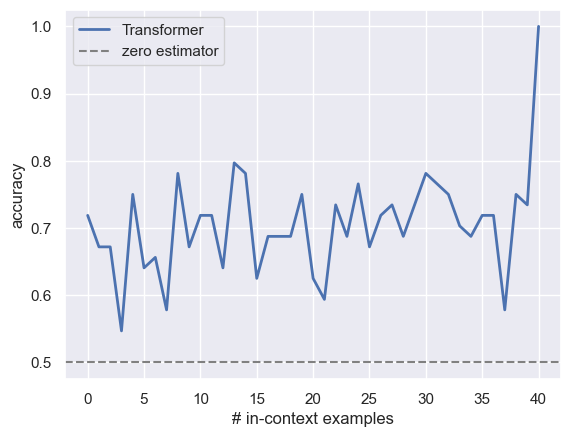

In [22]:
metric = task.get_metric()
loss = metric(pred, test_ys).numpy()

sparsity = conf.training.task_kwargs.sparsity if "sparsity" in conf.training.task_kwargs else None
baseline = {
    "linear_regression": n_dims,
    "sparse_linear_regression": sparsity,
    "relu_2nn_regression": n_dims,
    "decision_tree": 1,
    "rbf_logistic_regression": 0.5,
    "noisy_rbf_logistic_regression": 0.5
}[conf.training.task]

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("accuracy")
plt.legend()
plt.show()

As an exploration example, let's see how robust the model is to doubling all the inputs.

In [23]:
xs2 = 2 * test_xs
ys2 = task.evaluate(xs2)
with torch.no_grad():
    pred2 = model(xs2, ys2)

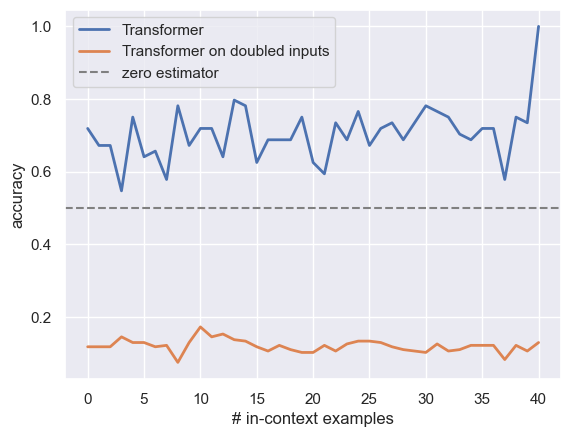

In [24]:
loss2 = metric(pred2, ys2).numpy()

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.plot(loss2.mean(axis=0) / 4, lw=2, label="Transformer on doubled inputs")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("accuracy")
plt.legend()
plt.show()

The error does increase, especially when the number of in-context examples exceeds the dimension, but the model is still relatively accurate.

For classification, the model is not robust when we double all the inputs.

In [93]:
from analysis.query_scale import *
import numpy as np

In [94]:
mdl, conf = get_model_from_run(run_path)

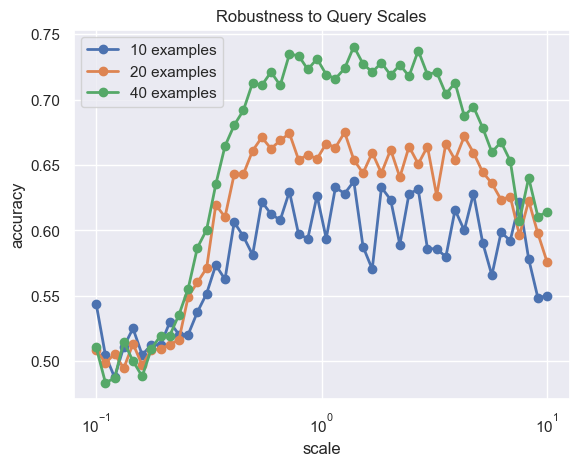

In [95]:
query_scale(mdl, conf, np.geomspace(0.1, 10, 50))

Plotting the decision boundary

In [5]:
import torch.nn.functional as F

model, conf = get_model_from_run("../models/rbf_lr_dim2/trained")

n_dims = conf.model.n_dims
batch_size = conf.training.batch_size

data_sampler = get_data_sampler(conf.training.data, n_dims)
task_sampler = get_task_sampler(
    conf.training.task,
    n_dims,
    batch_size,
    **conf.training.task_kwargs
)

NameError: name 'get_data_sampler' is not defined

In [165]:
from tqdm.notebook import tqdm

def compute_decision_boundary():
    task = task_sampler()
    xs = data_sampler.sample_xs(b_size=1, n_points=conf.training.curriculum.points.end, seeds=[2])
    ys = task.evaluate(xs)
    xs_flat, ys_flat = xs[0], ys[0]
    xs_flat_ones = xs_flat[ys_flat == 1]
    xs_flat_zeros = xs_flat[ys_flat == -1]

    ones = torch.zeros((0, 2))
    zeros = torch.zeros((0, 2))
    x_ticks, y_ticks = 50, 50
    with torch.no_grad():
        for x in tqdm(torch.linspace(-3, 3, x_ticks)):
            y_coords = torch.linspace(-3, 3, y_ticks)
            test_xs = torch.tile(xs, (y_ticks, 1, 1))
            test_xs[:, -1, 0] = x
            test_xs[:, -1, 1] = y_coords
            test_ys = task.evaluate(test_xs)
            pred = model(test_xs, test_ys)[:, -1].flatten()
            ones_mask = pred > 0
            # deal with ones
            y_coords_ones = y_coords[ones_mask]
            x_coords_ones = torch.ones_like(y_coords_ones) * x
            ones = torch.cat((ones, torch.stack((x_coords_ones, y_coords_ones), dim=1)))

            # deal with zeros
            y_coords_zeros = y_coords[~ones_mask]
            x_coords_zeros = torch.ones_like(y_coords_zeros) * x
            zeros = torch.cat((zeros, torch.stack((x_coords_zeros, y_coords_zeros), dim=1)))

    db_radius = get_rbf_db(task.center, xs_flat).item()

    return task, ones, zeros, xs_flat_ones, xs_flat_zeros, db_radius

def plot_decision_boundary(task, ones, zeros, xs_flat_ones, xs_flat_zeros, db_radius):
    fig, ax = plt.subplots()
    ax.set_title("Decision Boundary Visualization")
    ax.set_aspect(1)
    ax.scatter(ones[:, 0], ones[:, 1])
    ax.scatter(zeros[:, 0], zeros[:, 1])
    ax.scatter(xs_flat_ones[:, 0], xs_flat_ones[:, 1])
    ax.scatter(xs_flat_zeros[:, 0], xs_flat_zeros[:, 1])
    ax.scatter(task.center[0], task.center[1], marker='x')
    db = plt.Circle((task.center[0], task.center[1]), db_radius, fill=False, color='red')
    ax.add_patch(db)
    plt.show()

    
def get_rbf_db(center, xs_b):
    broadcast_center = center.reshape(1, 1, center.shape[0])
    dist = (torch.cdist(xs_b, broadcast_center).squeeze(-1))
    medians, _ = torch.median(dist, dim=1, keepdim=True)
    medians += 1e-6
    return medians

  0%|          | 0/50 [00:00<?, ?it/s]

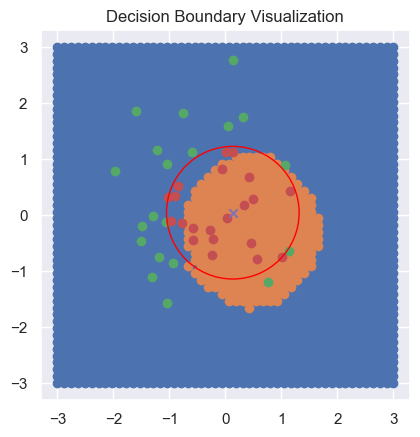

In [167]:
task, ones, zeros, xs_flat_ones, xs_flat_zeros, db_radius = compute_decision_boundary()
plot_decision_boundary(task, ones, zeros, xs_flat_ones, xs_flat_zeros, db_radius)

In [1]:
import seaborn as sns